# Computer Vision without Deep Learning or CNNs

In this notebook I have tried to perform Classification task on MNIST digit recognizer dataset. Though better models have been made using deep learning CNN (like here -https://www.kaggle.com/nickelkumawat/digit-recognizer-cnn-keras).

In this notebook I will explicity use NON DL and CNN methods.
In last we can see that appreciable accuracy could be achieved using traditional ML models too which are often ignored. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import GridSearchCV

11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


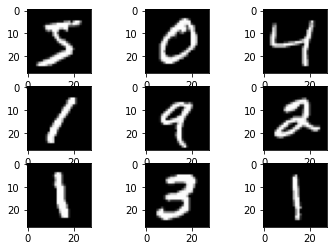

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330+1+i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

Lets flatten the 28*28 arrays to 784 features since we are going to use traditional ML methods and they mostly require 1-dimensional arrays.

In [3]:
x_train=trainX.reshape(60000,28*28)
x_test=testX.reshape(10000,28*28)

###Preprocessing

To scale our values we can either use MinMax scaler or can simply divide each pixel by 255 (highest pixel value)

In [4]:
x_train,x_test=x_train/255,x_test/255 # values have been rescaled between 0 and 1.

for further preprocessing it is better to deal in pandas dataframe than numpy

In [5]:
temp_x=np.vstack((x_train,x_test))
temp_x.shape


(70000, 784)

In [6]:
x=pd.DataFrame(temp_x)


In [7]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.576471,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have 784 features as of now

In [8]:
temp_y=np.hstack((trainy,testy))
temp_y.shape

(70000,)

In [9]:
y=pd.DataFrame(temp_y.T)

In [10]:
y

,0
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


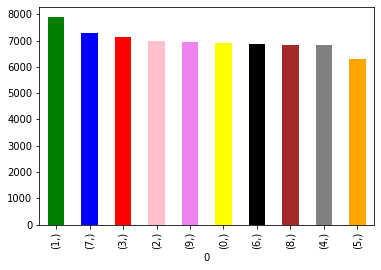

In [11]:
counts=y.value_counts().plot(kind='bar',stacked=True,color=['green','blue', 'red','pink','violet','yellow','black','brown','grey','orange'])

Dataset contains 1 with highest number of frequency and 5 with lowest. Overall dataset is quite balanced and adequate instances are present for the classification of each class

### Feature Engineering

#### PCA - Principal Component Analysis

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101) #train-test split

In [13]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

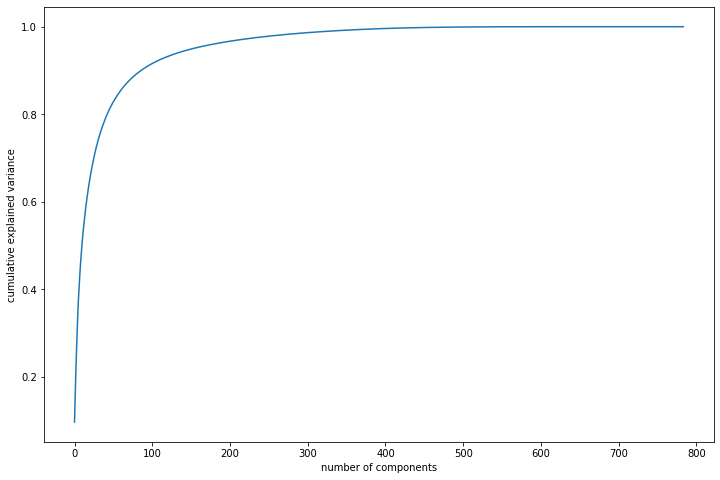

In [14]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09702115, 0.16867777, 0.23019177, 0.28430736, 0.33339318,
       0.37640297, 0.40934901, 0.43815888, 0.46575034, 0.4890623 ,
       0.510119  , 0.53042315, 0.54753416, 0.56447251, 0.58029244,
       0.59522113, 0.60847658, 0.6212093 , 0.6330881 , 0.64464873,
       0.65533641, 0.66548006, 0.67506514, 0.68420609, 0.69302307,
       0.70140575, 0.70951178, 0.71733233, 0.72472616, 0.73160766,
       0.738179  , 0.74460609, 0.75062511, 0.75646986, 0.76216324,
       0.76760327, 0.77265249, 0.77753327, 0.78231526, 0.78701132,
       0.79153565, 0.79598097, 0.80016194, 0.80413631, 0.80799268,
       0.81174228, 0.81534189, 0.81883532, 0.8222428 , 0.82543344,
       0.82860893, 0.8317038 , 0.83466232, 0.83753683, 0.84035533,
       0.84306121, 0.84574489, 0.84832624, 0.85086105, 0.85331099,
       0.85571223, 0.85809245, 0.86036843, 0.86258492, 0.86470213,
       0.86676177, 0.86879647, 0.87074815, 0.87266549, 0.87455165,
       0.876424  , 0.87822344, 0.8799802 , 0.88171028, 0.88336

As we can see approximately after 200 features there is not much increament in explained variance thus we can say that the rest of the features are redundant.

In [16]:
pca = PCA(n_components=200)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Modelling

###1. Support Vector Classifier

In [55]:
# model
svc = SVC(C=10, gamma = 0.001, kernel="rbf")

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 0.9542380952380952 

time: 3min 27s (started: 2021-08-29 11:21:09 +00:00)


###2. Decision Trees

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf = DecisionTreeClassifier(random_state=0)

In [20]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [21]:
y_pred_clf = clf.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred_clf), "\n")

accuracy 0.8237619047619048 



###3. KNN

In [22]:

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
y_pred_knn=knn.predict(X_test)

In [24]:
# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred_knn), "\n")

accuracy 0.9709047619047619 



On observing above three models it was found that tree based models may not get close to better accuracy. Though KNN performed better but it will take time as major processing is done while making the prediction,so if we want to deploy our model SVC seems to be good choice.

Lets try to optimise our SVC now !

#####Grid Search

In [26]:
param_grid = {'C': [1, 10, 100], 
              'gamma': [ 0.001, 0.0001],
              'kernel': ['rbf','linear']}

In [ ]:
svc=SVC()
grid=GridSearchCV(svc, param_grid)
grid.fit(X_train,y_train)

The above code can be used to optimise the SVC, Since it takes a lot of time to run its better not to run it. The parameters used for the first time in SVC are optimum only.

###Testing Model

Now lets test our model on some real world dataset, You can write some digits on MS Paint or can upload some pics also if u want in jpg format.

Sample images used here can be found on https://github.com/nikhilkumawat1499/Digit-Recognizer-traditional-ML

In [26]:
import sys
import skimage.io
import skimage.color
import skimage
from skimage import transform


In [72]:


path='/content/One.jpg'
# read image
image = skimage.io.imread(fname=path)

time: 8 ms (started: 2021-08-29 11:46:25 +00:00)


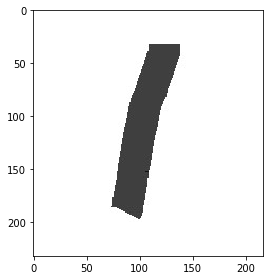

time: 245 ms (started: 2021-08-29 11:46:27 +00:00)


In [73]:
# display original image
skimage.io.imshow(image)



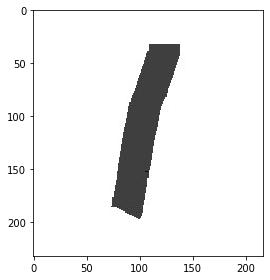

time: 244 ms (started: 2021-08-29 11:46:30 +00:00)


In [74]:
# convert to grayscale and display
gray_image = skimage.color.rgb2gray(image)
skimage.io.imshow(gray_image)

In [75]:
small =transform.resize(image=gray_image, output_shape=[28,28])

time: 9.73 ms (started: 2021-08-29 11:46:32 +00:00)


In [76]:
small=1-(small)**2

time: 1.66 ms (started: 2021-08-29 11:46:40 +00:00)


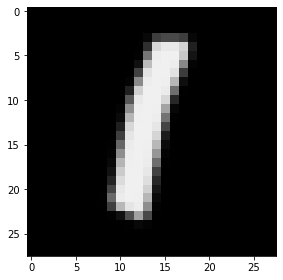

time: 247 ms (started: 2021-08-29 11:46:42 +00:00)


In [77]:
skimage.io.imshow(small)

In [78]:
small_pca=pca.transform(small.reshape(1,784))

time: 4.48 ms (started: 2021-08-29 11:46:44 +00:00)


In [79]:
small_pca.shape

(1, 200)

time: 4.4 ms (started: 2021-08-29 11:46:46 +00:00)


In [80]:
knn.predict(small_pca)

array([1], dtype=uint8)

time: 27 ms (started: 2021-08-29 11:46:48 +00:00)


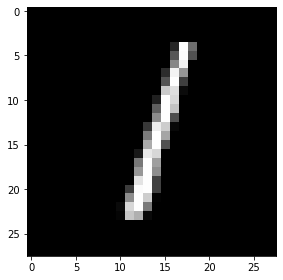

time: 254 ms (started: 2021-08-29 11:46:51 +00:00)


In [81]:
skimage.io.imshow(x_test[2].reshape(28,28))

Lets write a final function now so that one can test our model on any image

In [82]:
def predict(path='', ML_model=svc):
  image = skimage.io.imread(fname=path)
  
  # convert to grayscale and display
  gray_image = skimage.color.rgb2gray(image)
  skimage.io.imshow(gray_image)
  small =transform.resize(image=gray_image, output_shape=[28,28])
  small=1-(small)
  skimage.io.imshow(small)
  #PCA to decrease features from 784 to 200
  small_pca=pca.transform(small.reshape(1,784))
  #Prediction
  print(ML_model.predict(small_pca))




time: 9.98 ms (started: 2021-08-29 11:46:56 +00:00)


In [83]:
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.06 s (started: 2021-08-29 11:46:58 +00:00)


[1]


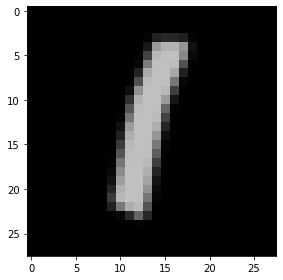

time: 306 ms (started: 2021-08-29 11:47:04 +00:00)


In [84]:


predict(path='/content/One.jpg',ML_model=svc)

[1]


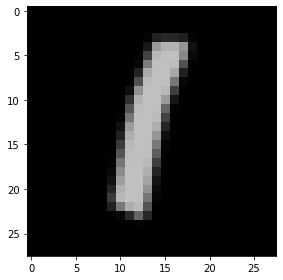

time: 341 ms (started: 2021-08-29 12:09:08 +00:00)


In [101]:


predict(path='/content/One.jpg',ML_model=knn)

[2]


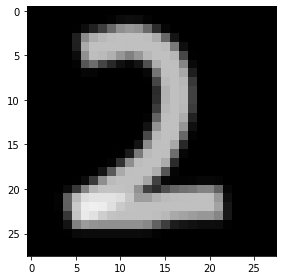

time: 313 ms (started: 2021-08-29 12:09:32 +00:00)


In [102]:


predict(path='/content/Two.jpg',ML_model=svc)

[2]


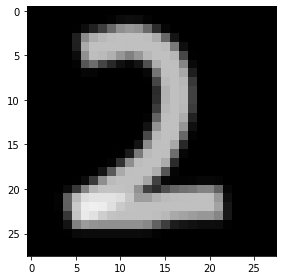

time: 356 ms (started: 2021-08-29 12:09:52 +00:00)


In [103]:


predict(path='/content/Two.jpg',ML_model=knn)

As we can see that SVC performs a bit faster than KNN. Though in some borderline differences between closely looking digits it was found that KNN works better. So as usual the trade-off is between run-time vs accuracy !! 
in more real world problems this is the most common dilemma, thus hyperparamters should not be only optimised according to the needs i.e. Maximum accuracy or Minimum runtime. 

Though we could have optimised aur tree based models too by using more features or may have used different model, but in my experience i would highly suggest to use PCA in combination with Support Vector Machines in case of high number of features.

Dont forget to play with different hyperparameters like number of components in PCA etc.


Have Fun !!